In [12]:
 # compare simulations of FRBs
from pylab import *
import matplotlib as mpl
import seaborn as sns
sys.path.append('/Users/ban115/bolton/craft/code/python') # for calc11

import calc11
import os
import simfrb
import numpy as np
from scipy import constants
import fdmt # you'll need to have ../python in  you PYTHONPATH
import craco
import simfrb
reload(simfrb)
reload(fdmt)
%matplotlib inline

In [13]:
fch1 = 0.735
nchan = 32
foff = 0.001
tsamp = 1.7
dm = 100
amp = 1 
toffset = 10
noiserms = 0
ntimes = 64
dclevel = 0

In [14]:
a1 = simfrb.mkfrb2(fch1, foff, nchan, tsamp, dm, amp, toffset, noiserms, ntimes, dclevel)


In [15]:
reload(simfrb)
reload(fdmt)
a2 = simfrb.mkfrb_fdmt(fch1, foff, nchan, tsamp, dm, amp, toffset, noiserms, ntimes, dclevel)

In [16]:
print a1.shape, a2.shape
assert a1.shape == a2.shape

(64, 32) (64, 32)


All OK? False Difference^2= 11.494302463197991


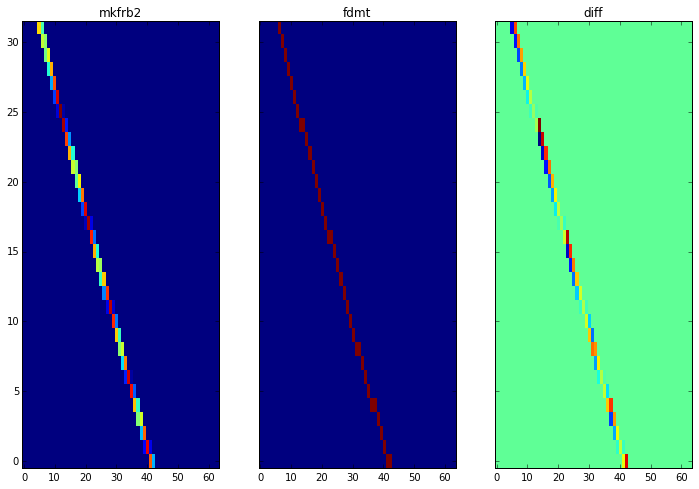

In [17]:
def myimshow(ax, d, title='', **kwargs):
    ax.imshow(d, aspect='auto', origin='lower', interpolation='nearest')
    ax.set_title(title)

fig, axs = subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches([12,8])
myimshow(axs[0], a1.T, 'mkfrb2')
myimshow(axs[1], a2.T, 'fdmt')
myimshow(axs[2], a2.T - a1.T, 'diff')
#axs[0].set_xlim(0,10)

print "All OK?", np.all(a2 == a1), 'Difference^2=', np.sum((a2 - a1)**2)

In [18]:
ntoff = 10
nfoff = 10
abserr = np.zeros((ntoff, nfoff))
for itoff, t_off in enumerate(linspace(-1, 1, ntoff)):
    for ifoff, f_off in enumerate(linspace(-1, 1, nfoff)):
        a1 = simfrb.mkfrb2(fch1+f_off*foff, foff, nchan, tsamp, dm, amp, toffset+1+t_off*tsamp, noiserms, ntimes, dclevel)
        abserr[itoff, ifoff] = sum(a1 - a2)**2

(10, 10)


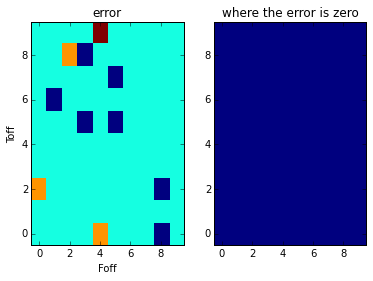

In [19]:
print abserr.shape
fig, ax = subplots(1,2)
myimshow(ax[0], abserr, 'error')
ax[0].set_xlabel('Foff')
ax[0].set_ylabel('Toff')
myimshow(ax[1], abserr==0, 'where the error is zero')

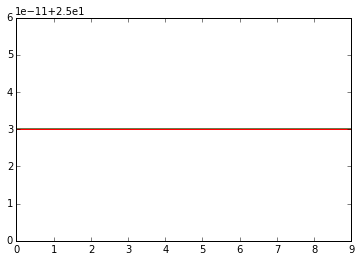

In [9]:
plot(abserr)

(array([ 7.,  0.,  0.,  0., 89.,  0.,  0.,  0.,  3.,  1.]),
 array([25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.]),
 <a list of 10 Patch objects>)

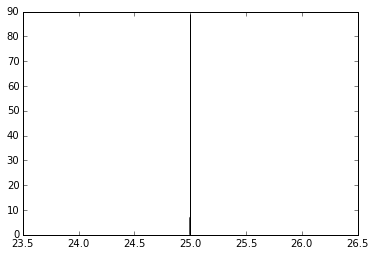

In [10]:
hist(abserr.flatten())

In [11]:
abserr

array([[25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.],
       [25., 25., 25., 25., 25., 25., 25., 25., 25., 25.]])